Задание
1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника:
UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.
Вычислить корреляции между признаками на всей таблице и отдельно по классам.
Визуализировать распределения классов на всех парах переменных.
2. Выбрать две переменные. Построить и визуализировать (показать разделяющую
кривую) решения методами:
 линейный и квадратичный дискриминант,
 логистическая регрессия,
 SVM (линейное и квадратичное ядро).
Пример подходящей визуализации есть в sklearn.
В следующих заданиях можно оставить только два (наименее разделимых) класса.
3. Построить линейный дискриминант на всех переменных. Визуализировать ответы
алгоритма (выделить, например, цветом) и классы объектов (выделить, например,
формой маркеров) во всех двумерных подпространствах.
4. На двух переменных из п.2 вычислить квадратичную разделяющую функцию
непосредственно по оценкам ковариационных матриц и средних (самостоятельно
реализовать метод, не используя готовый). Визуализировать её и сравнить с
решением из п2.

In [ ]:
from sklearn import datasets, svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors

In [ ]:
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame['target'].map(lambda x : iris.target_names[x])

корреляция внутри одного класса

In [ ]:
iris_frame.groupby(['name','target']).corr()

sepal length (cm)  sepal width (cm)  \
name       target                                                          
setosa     0      sepal length (cm)           1.000000          0.742547   
                  sepal width (cm)            0.742547          1.000000   
                  petal length (cm)           0.267176          0.177700   
                  petal width (cm)            0.278098          0.232752   
versicolor 1      sepal length (cm)           1.000000          0.525911   
                  sepal width (cm)            0.525911          1.000000   
                  petal length (cm)           0.754049          0.560522   
                  petal width (cm)            0.546461          0.663999   
virginica  2      sepal length (cm)           1.000000          0.457228   
                  sepal width (cm)            0.457228          1.000000   
                  petal length (cm)           0.864225          0.401045   
                  petal width (cm)            0.281108          0.537728   

                                     petal length (cm)  petal width (cm)  
name       target                                                         
setosa     0      sepal length (cm)           0.267176          0.278098  
                  sepal width (cm)            0.177700          0.232752  
                  petal length (cm)           1.000000          0.331630  
                  petal width (cm)            0.331630          1.000000  
versicolor 1      sepal length (cm)           0.754049          0.546461  
                  sepal width (cm)            0.560522          0.663999  
                  petal length (cm)           1.000000          0.786668  
                  petal width (cm)            0.786668          1.000000  
virginica  2      sepal length (cm)           0.864225          0.281108  
                  sepal width (cm)            0.401045          0.537728  
                  petal length (cm)           1.000000          0.322108  
                  petal width (cm)            0.322108          1.000000

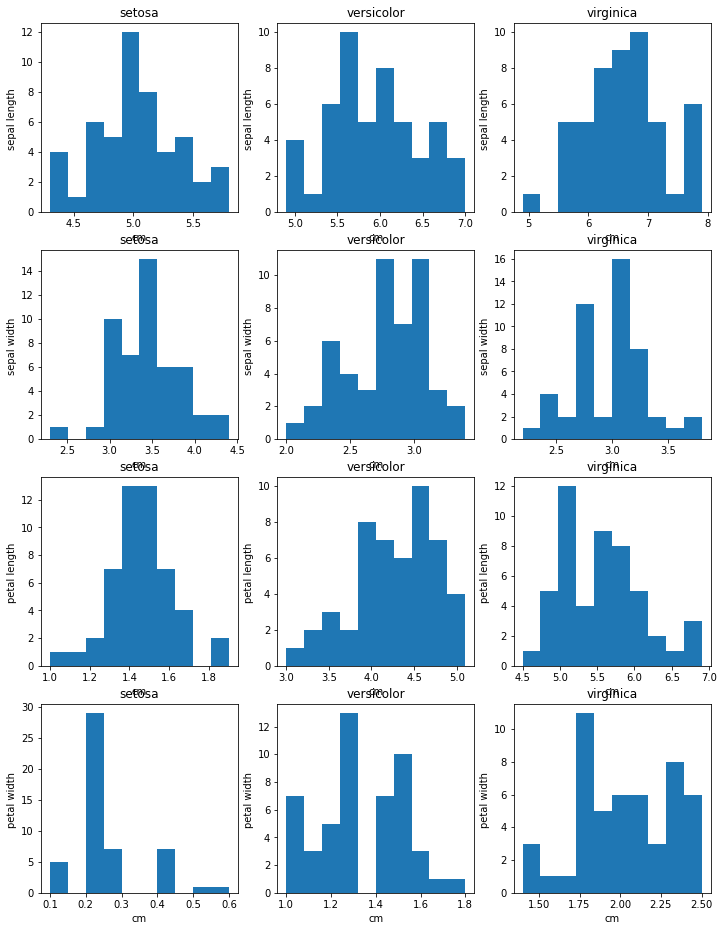

In [ ]:
plt.figure(figsize = (12, 16))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris_frame.loc[iris_frame['name'] == target_name,feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])

Визуализируем распределения по классам на всех парах переменных:

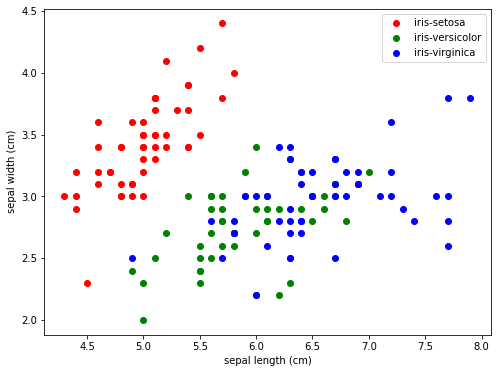

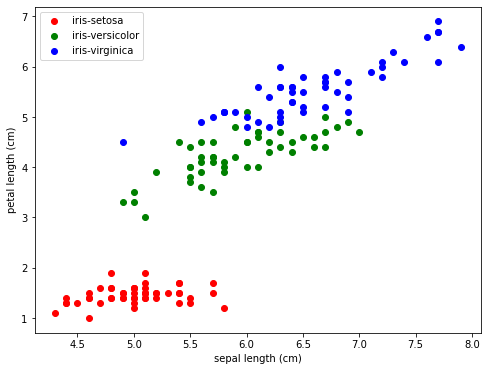

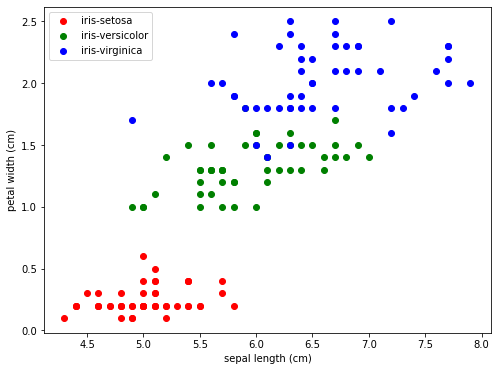

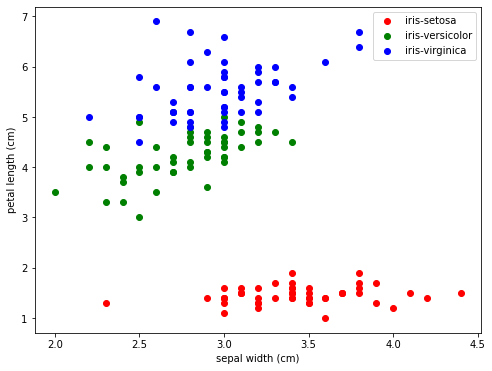

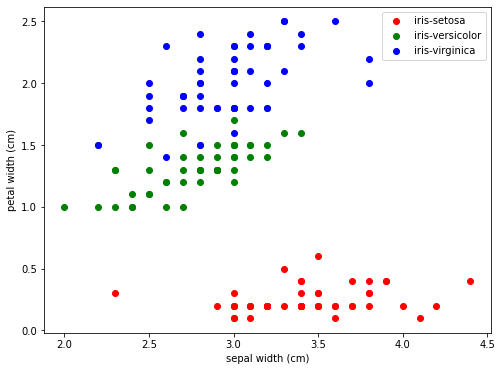

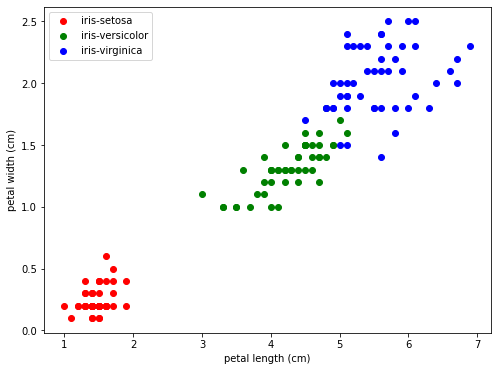

In [ ]:
data = iris_frame
columns = data.columns[:-2]
def plot_two_params(xx, yy):
    plt.figure(2, figsize=(8,6))
    plt.clf()
    colors = ['red', 'green', 'blue']
    labels = ['iris-setosa','iris-versicolor', 'iris-virginica']
    for i in range(len(labels)):
        plt.scatter(data.loc[data.target==i,xx].values, data.loc[data.target==i,yy].values, c=colors[i], label=labels[i])
    plt.xlabel(xx)
    plt.ylabel(yy)
    plt.legend()
    plt.show()

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i!=j:
            plot_two_params(columns[i], columns[j])

54 % 6 = 0

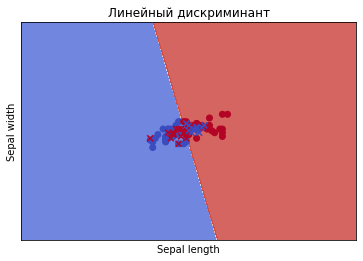

In [ ]:
X = iris.data[:, :2]
Y = iris.target
X = X[Y!=0]
Y = Y[Y!=0]

def plot_classification(classifier):
    
    y_pred= classifier.predict(X)
    
    true_predict = y_pred == Y
    false_predict = y_pred != Y
    
    offstep = 5
    x_min, x_max = X[:, 0].min() - offstep, X[:, 0].max() + offstep
    y_min, y_max = X[:, 1].min() - offstep, X[:, 1].max() + offstep
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[true_predict,0], X[true_predict,1], c=Y[true_predict], cmap=plt.cm.coolwarm,marker='o') 
    plt.scatter(X[false_predict,0], X[false_predict,1], c=Y[false_predict], cmap=plt.cm.coolwarm,marker='x') 
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

plt.title('Линейный дискриминант')
lin_disc= LinearDiscriminantAnalysis().fit(X,Y)
plot_classification(lin_disc) 

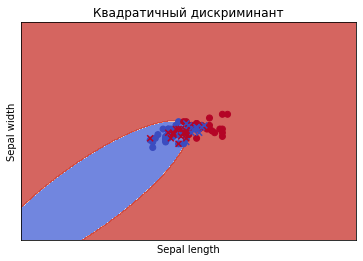

In [ ]:
quad_disc= QuadraticDiscriminantAnalysis().fit(X,Y)
plt.title('Квадратичный дискриминант')
plot_classification(quad_disc) 

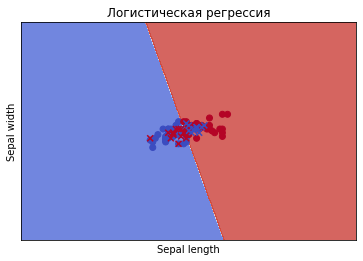

In [ ]:
logreg = LogisticRegression().fit(X, Y)
plt.title('Логистическая регрессия')
plot_classification(logreg)

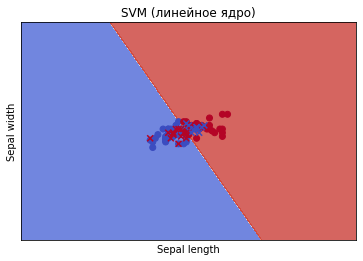

In [ ]:
svc= svm.SVC(kernel='linear').fit(X,Y)
plt.title('SVM (линейное ядро)')
plot_classification(svc)

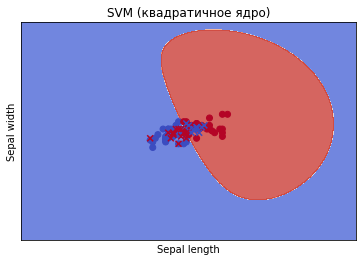

In [ ]:
poly_svc=svm.SVC(degree=2).fit(X,Y)
plt.title('SVM (квадратичное ядро)')
plot_classification(poly_svc)

#### 3. Строим линейный дискриминант на всех переменных. Визуализируем ответы алгоритма.

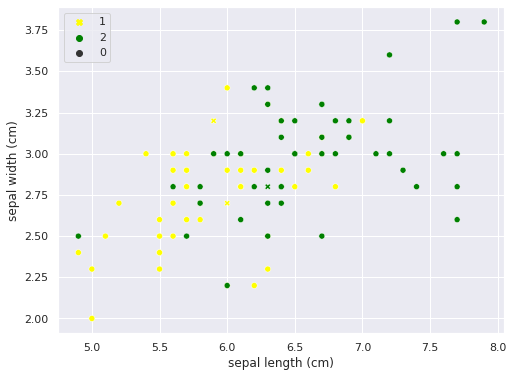

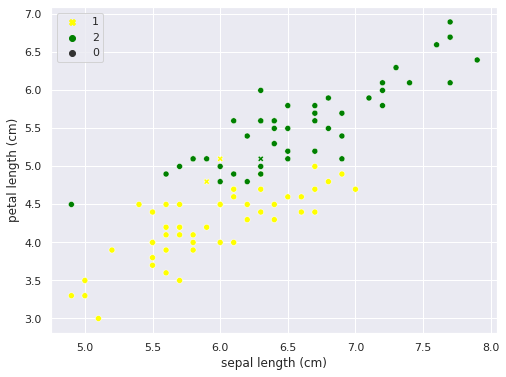

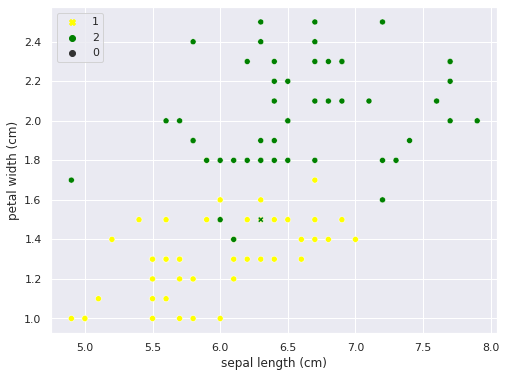

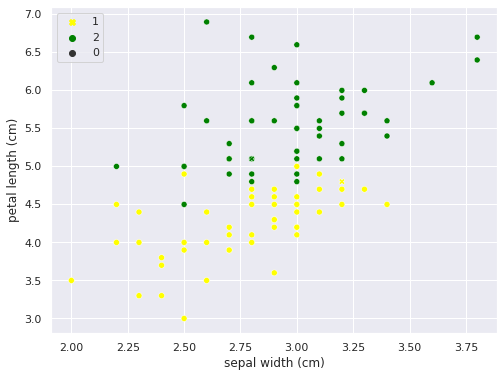

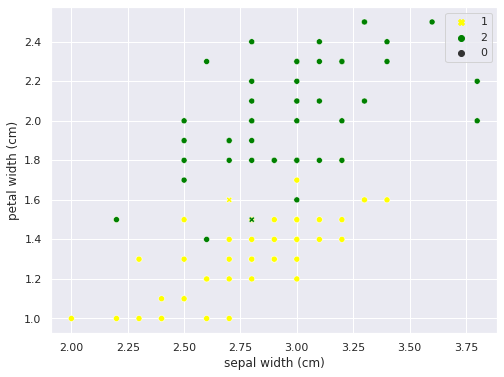

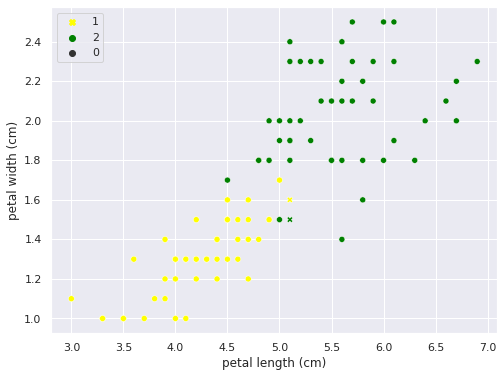

In [ ]:
X=iris.data
Y=iris.target

X=X[Y!=0,:]
Y=Y[Y!=0]

lin_disc= LinearDiscriminantAnalysis().fit(X,Y)
y_predict=lin_disc.predict(X)

data=pd.DataFrame(X,columns=['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)'])

for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i!=j:
            sns.set()
            sns.set(rc={'figure.figsize':(8, 6)})
            ax= sns.scatterplot(x=columns[i], y=columns[j], data=data, hue=Y, style=abs(y_predict-Y), palette={1:'yellow',2:'green'})
            plt.show()

#### 4. Вычисляем на двух переменных из п.2 квадратичной разделяющей функции по оценкам ковариационных матриц и средних.

In [ ]:
#Воспользуемся QDA
X=iris.data
Y=iris.target

X=X[Y!=0,:2]
Y=Y[Y!=0]
Y -=1

quad_disc= QuadraticDiscriminantAnalysis().fit(X,Y)
titles=('Quadratic Discriminant')
def qda_score(x,mu_k,sigma_inv,pi_k):
    return (np.log(pi_k) -1/2 * np.log(np.linalg.det(sigma_inv)) - 1/2 * (x-mu_k).T @ sigma_inv @ (x-mu_k)).flatten()[0]

def predict_qda_class(x,mu_list,sigma_list,pi_list):
    scores_list=[]
    classes=len(mu_list)
    for p in range(classes):
        score= qda_score(x.reshape(-1,1), mu_list[p].reshape(-1,1), sigma_list[p], pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

a1 = data[['sepal length (cm)', 'sepal width (cm)']]
a1 = a1.join(pd.DataFrame(Y, columns=['species']))
a1.head()

,sepal length (cm),sepal width (cm),species
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


Визуализируем решение и сравниваем его с п.2.

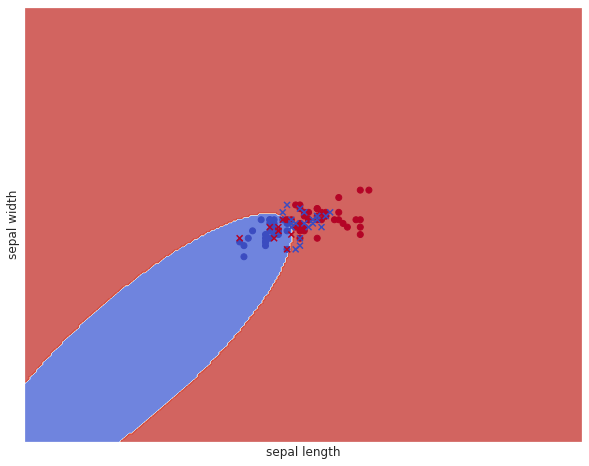

In [ ]:
mu_list = np.split(a1.groupby('species').mean().values, 2)
sigma_list = np.split(a1.groupby('species').cov().values, 2)
for i in range(len(sigma_list)):
    sigma_list[i] = np.linalg.inv(sigma_list[i])
pi_list = a1.iloc[:,2].value_counts().values / len(a1)

y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = predict_qda_class(X[i], mu_list, sigma_list, pi_list)

true_predict = y_pred == Y
false_predict = y_pred != Y

offstep = 5
x_min, x_max = X[:, 0].min() - offstep, X[:, 0].max() + offstep
y_min, y_max = X[:, 1].min() - offstep, X[:, 1].max() + offstep
h =0.05
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([predict_qda_class(np.array([x1, x2]).reshape(-1,1), mu_list, sigma_list, pi_list) for x1, x2 in zip(np.ravel(x), np.ravel(y))])
Z = Z.reshape(x.shape)
plt.figure(1, figsize=(10,8))
plt.contourf(x, y, Z, cmap = plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[true_predict,0], X[true_predict,1], c=Y[true_predict],cmap=plt.cm.coolwarm,marker='o') 
plt.scatter(X[false_predict,0], X[false_predict,1], c=Y[false_predict],cmap=plt.cm.coolwarm,marker='x') 

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.xticks(())
plt.yticks(())
plt.show()

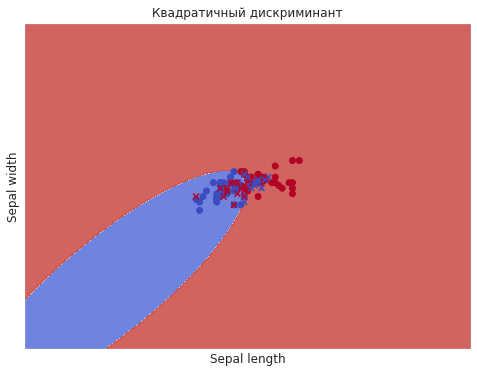

In [ ]:
quad_disc= QuadraticDiscriminantAnalysis().fit(X,Y)
plt.title('Квадратичный дискриминант')
plot_classification(quad_disc) 

In [ ]:
quad_disc= QuadraticDiscriminantAnalysis().fit(X,Y)
y_pred_orig= quad_disc.predict(X)
print(sum(abs(y_pred - y_pred_orig)))

16.0


In [ ]:
y_pred

array([1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.])

In [ ]:
y_pred_orig

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])